In [1]:
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
sys.path.append(parent_dir)

In [2]:
from functions.import_data_parquet import NFLDataLoader
from functions.data_transformation import prep_schedule_data
from function_library.py_data_visualizations.basic_data_descriptions import basic_dataframe_description
from function_library.py_data_visualizations.basic_plots import plot_histogram

In [3]:
nfl_data_loader = NFLDataLoader()
base_df = nfl_data_loader.schedule(seasons = [2022, 2023, 2024, 2025])
base_df = prep_schedule_data(base_df)
result_df = base_df.dropna(subset=['away_score', 'home_score'])
future_df = base_df[base_df[['away_score', 'home_score']].isna().all(axis=1)]
result_df.to_csv("csv_output/schedule_result_df_eda.csv")
future_df.to_csv("csv_output/schedule_future_df_eda.csv")

In [4]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 6137 to 7138
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1002 non-null   int64  
 1   week              1002 non-null   int64  
 2   game_id           1002 non-null   object 
 3   gameday           1002 non-null   object 
 4   gametime          1002 non-null   object 
 5   game_type         1002 non-null   object 
 6   neutral_site      1002 non-null   bool   
 7   stadium_id        1002 non-null   object 
 8   stadium           1002 non-null   object 
 9   away_team         1002 non-null   object 
 10  home_team         1002 non-null   object 
 11  away_rest         1002 non-null   int64  
 12  home_rest         1002 non-null   int64  
 13  away_moneyline    1002 non-null   float64
 14  home_moneyline    1002 non-null   float64
 15  away_spread       1002 non-null   float64
 16  home_spread       1002 non-null   float

In [5]:
basic_dataframe_description(result_df, transpose_description=False)


df Overview:
 Shape: (1002, 36)
 Columns: 36
 Memory: 1.04 MB
 Missing values: None
 Data types: {dtype('O'): 16, dtype('float64'): 14, dtype('int64'): 5, dtype('bool'): 1}


,season,week,away_rest,home_rest,away_moneyline,home_moneyline,away_spread,home_spread,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,away_score,home_score,result,total,overtime
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.00000
mean,2023.296407,9.265469,7.396208,7.479042,49.350299,-114.032934,1.683134,-1.683134,-87.683633,-86.086826,44.139721,-102.170659,-100.071856,0.333333,21.232535,23.718563,2.486028,44.951098,0.05489
std,1.035324,5.543343,1.979340,2.108463,270.829082,307.986448,5.713318,5.713318,65.323423,67.604047,4.221447,37.733354,43.908779,0.471640,9.487297,9.929654,13.834772,13.631317,0.22788
min,2022.000000,1.000000,4.000000,4.000000,-1800.000000,-2400.000000,-16.500000,-19.500000,-125.000000,-125.000000,28.500000,-122.000000,-120.000000,0.000000,0.000000,0.000000,-40.000000,3.000000,0.00000
25%,2022.000000,4.000000,7.000000,7.000000,-155.000000,-250.000000,-3.000000,-5.500000,-112.000000,-112.000000,41.500000,-110.000000,-112.000000,0.000000,15.000000,17.000000,-6.000000,36.000000,0.00000
50%,2023.000000,9.000000,7.000000,7.000000,124.000000,-142.000000,2.500000,-2.500000,-110.000000,-110.000000,44.000000,-110.000000,-110.000000,0.000000,20.000000,24.000000,3.000000,44.000000,0.00000
75%,2024.000000,14.000000,7.000000,7.000000,205.000000,130.000000,5.500000,3.000000,-105.000000,-105.000000,47.000000,-107.000000,-108.000000,1.000000,27.000000,30.000000,10.000000,53.000000,0.00000
max,2025.000000,22.000000,15.000000,15.000000,1200.000000,1000.000000,19.500000,16.500000,113.000000,113.000000,56.500000,106.000000,106.000000,1.000000,51.000000,70.000000,50.000000,93.000000,1.00000


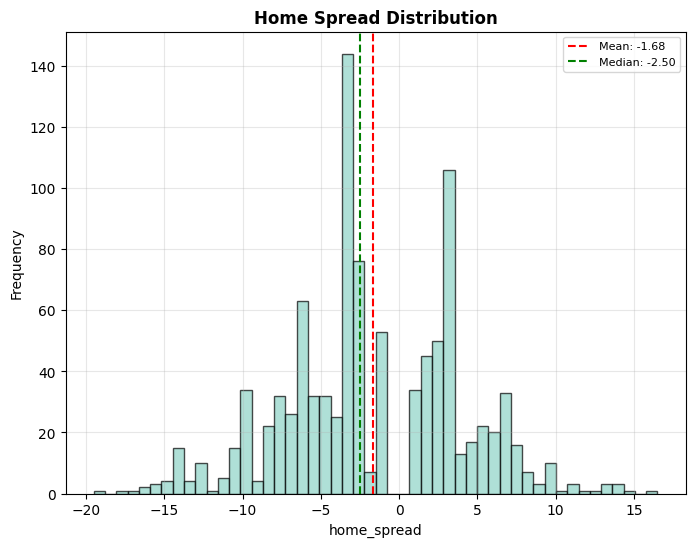

In [6]:
plot_histogram(result_df, 'home_spread', 'Home Spread')

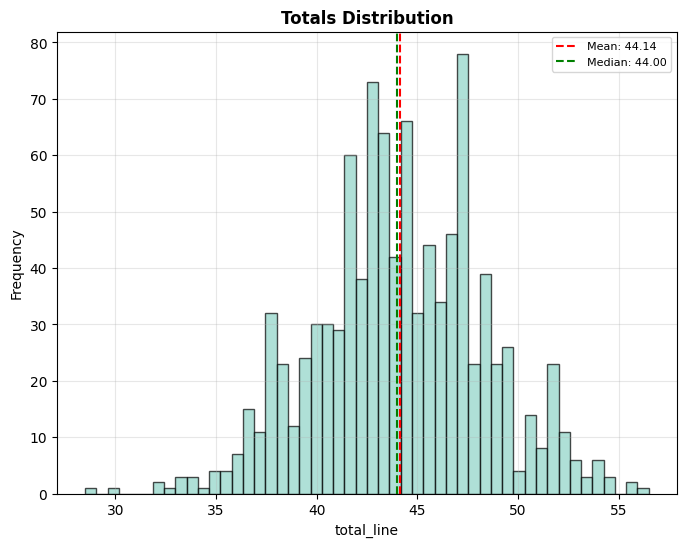

In [7]:
plot_histogram(result_df, 'total_line', 'Totals')